# 네이버 블로그 크롤링 (네이버 API 이용)


## 들어가며...



## 1) 크롤링? 파싱?

### 1-1) 크롤링

- '웹 크롤러'라는 단어에서 유래되었음.
- 크롤러란 조직적, 자동화된 방법으로 WWW를 탐색하는 컴퓨터 프로그램.
- 크롤링은 크롤러가 하는 작업을 부르는 말.
- 여러 인터넷 사이트의 페이지(문서,html 등)를 수집해서 분류하는 것.
- 대체로 찾아낸 데이터를 저장한 후 쉽게 찾을 수 있게 인덱싱 수행.

### 1-2) 파싱

- 파싱이란 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공하는 것.
- 파싱이란 일련의 문자열을 의미있는 '토큰'으로 분해하고 이들로 이루어진 '파스 트리'를 만드는 과정.
- 입력 토큰에 내제된 자료 구조를 빌드하고 문법을 검사하는 역할을 함.

## 2) 애플리케이션 등록 ( API 이용신청)

![애플리케이션 등록_1](https://user-images.githubusercontent.com/51112316/61574953-2f655d80-ab01-11e9-8b8f-cc74183302da.jpg)
![애플리케이션 등록_2](https://user-images.githubusercontent.com/51112316/61574954-31c7b780-ab01-11e9-9274-e1d237547d94.jpg)

### 2-1) 네이버API  예제 사용

- 네이버개발자 -> Products -> 서비스API -> 검색 -> 개발 가이드 보기 -> 0.API호출예제 -> Python

#### [API호출예제](https://developers.naver.com/docs/search/blog/)

~~~python
import java.io.BufferedReader;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.URL;
import java.net.URLEncoder;

public class APIExamSearchBlog {

    public static void main(String[] args) {
        String clientId = "YOUR_CLIENT_ID";//애플리케이션 클라이언트 아이디값";
        String clientSecret = "YOUR_CLIENT_SECRET";//애플리케이션 클라이언트 시크릿값";
        try {
            String text = URLEncoder.encode("그린팩토리", "UTF-8");
            String apiURL = "https://openapi.naver.com/v1/search/blog?query="+ text; // json 결과
            //String apiURL = "https://openapi.naver.com/v1/search/blog.xml?query="+ text; // xml 결과
            URL url = new URL(apiURL);
            HttpURLConnection con = (HttpURLConnection)url.openConnection();
            con.setRequestMethod("GET");
            con.setRequestProperty("X-Naver-Client-Id", clientId);
            con.setRequestProperty("X-Naver-Client-Secret", clientSecret);
            int responseCode = con.getResponseCode();
            BufferedReader br;
            if(responseCode==200) { // 정상 호출
                br = new BufferedReader(new InputStreamReader(con.getInputStream()));
            } else {  // 에러 발생
                br = new BufferedReader(new InputStreamReader(con.getErrorStream()));
            }
            String inputLine;
            StringBuffer response = new StringBuffer();
            while ((inputLine = br.readLine()) != null) {
                response.append(inputLine);
            }
            br.close();
            System.out.println(response.toString());
        } catch (Exception e) {
            System.out.println(e);
        }
    }
}
~~~

#### 문제 발생 :  

#### 네이버 블로그 형식 맞춰 긁어왔음.
                  
#### 사실은 요약된 내용.

#### 모든 내용을 다 보고싶으면 개발이 필요.

# 네이버 블로그 크롤링

In [1]:
import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

naver_Client_id = "E4zDnlSmVAnJ7dvIOUUx"
naver_Client_secret = "lLxEw7DWbB"

In [2]:
def get_blog_count(query,display) :
    encode_query=urllib.parse.quote(query)
    search_url="https://openapi.naver.com/v1/search/blog?query="+ encode_query
    # 위의 https://~ 는 따온 API호출예제에 있음.
    request=urllib.request.Request(search_url)
    # 이렇게 하면 내가 만들었던 url 형태로 요청한다.
    # 그러나 이렇게 하면 API로부터 거부당한다.
    # 왜냐하면 ID, Secret을 주지 않았기 때문에 아래와 같이 이것을 입력해준다.
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    # code를 받아와서 웹에서 정상적으로 접속했을 때 200번을 준다.
    if response_code is 200 :
        response_body = response.read()  # 실제로 읽어 들인다.
        response_body_dict = json.loads(response_body.decode('utf-8'))
        # 네이버에서 넘겨줄 때 json으로 넘겨주는데 이것을 전부 '딕셔너리'로 저장한다.
        
        print('Last build date :' + str(response_body_dict['lastBuildDate']))
        # json으로 넘겨받을 것들 중에서 최종날짜를 출력
        print('Total :' + str(response_body_dict['total']))  # 관측개수
        print('Start :' + str(response_body_dict['start']))
        print('Display :' + str(response_body_dict['display']))
        #이렇게 넘어온 것을 다 출력해본다.
        
        # 검색된 결과가 0 일 경우        
        if response_body_dict['total']== 0:
            blog_count = 0
        else :
            blog_total=math.ceil(response_body_dict['total']/int(display))
            # 위에서 한 번에 10개씩 출력한다고 했으니 나눠주어서 개수를 맞춰준다.
        
            if blog_total >= 1000 :
                blog_count = 1000
                # 최대 1000개로 제한이 있으니 1000개를 넘었을 때는 1000개로 지정한다.
            else : 
                blog_count = blog_total
        
            print('Blog total :' + str(blog_total))
            print('Blog count : ' + str(blog_count))
        
        return blog_count

- 블로그의 모든 내용을 가져오는 함수[(API사용예제)는 샘플 내용만 가져온다.]



In [3]:
def get_blog_post(query,display,start_index,sort):
    global no, fs
    #get_blog_count(query,display)를 정의할 때 사용했던 것과 동일하게 사용(아래 7문장)
    encode_query = urllib.parse.quote(query)
    # 동일하게 사용하나 search_url에는 옵션을 조금 더 추가해 준다.
    search_url = "https://openapi.naver.com/v1/search/blog?query=" + encode_query +"&display=" + str(display) + "&start=" + str(start_index) + "sort=" + sort
    request=urllib.request.Request(search_url)
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    #print(response_code) 이분은 윗부분까지 해서 접속이 잘되었는지를 확인하는 것.
        
    if response_code is 200:
        response_body=response.read()
        response_body_dict=json.loads(response_body.decode('utf-8'))
        # json이 해당하는 블로그가 여러개 나오면 전부 다 하나의 큰 덩어리로 주는데
        # 나눠서 하나씩 접근 하기 위해 아래의 코드를 짜줌.
        for item_index in range(0,len(response_body_dict['items'])):
            # 혹시 태그부분이 따라올 수 있기 때문에
            # 그것을 지우고 사용하기 위해  re(regular expression)으로 제거를 해준다.
            # 즉 태그를 없애주는 정규표현식을 이용한다.
            try :
                remove_html_tag = re.compile('<.*?>')
                title = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['title'])
                #또한 주소가 따라오는데 이건 필요 없는 것이다.그러므로 없애준다.
                link = response_body_dict['items'][item_index]['link'].replace("amp;","")
                # description에도 마찬가지로 태그가 따라올 수 있기 때문에 제거해준다.
                description = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['description'])
                blogger_name = response_body_dict['items'][item_index]['bloggername']
                #  포스트(개시글)의 주소가 아니라 블로그 자체의 링크를 가져옴.
                blogger_link = response_body_dict['items'][item_index]['bloggerlink']
                post_date = response_body_dict['items'][item_index]['postdate']
                #아래처럼 변환해서 가져와도 되고 그냥 주는대로 가져와도 된다.
                #post_date = datetime.datetime.strptime(response_body_dict[['item'][item_index]['postdate'],"%Y%m%d").strtime("%Y.%m.%d")
                
               # 이제 json에서 오는 결과를 하나씩 items에 다 들어가 있다. 그것을 이제 다 끄집어서 가져온다.
                no +=1
                print("-------------------------------------------------") #각각의 게시글을 구분시킴
                print("#"+ str(no))  #몇번째 게시글인지 출력
                print("Title :"+ title)
                print("Link :"+ link)
                print("Description :"+ description)
                print("Blogger Name :"+ blogger_name)
                print("Blogger Link :"+ blogger_link)
                print("Post Date :"+ post_date)
                
                                                                              
                post_code = requests.get(link)
                #  저 정보들은 사실 네이버 오픈 API에서 제공해주는 정보다.
                # 그런데 우리가 필요한 것은 실제 블로그에 포스트 된 내용이 필요하기 때문에
                # 뷰티풀숲을 이용해 가져온다. 
                post_text = post_code.text
                post_soup = BeautifulSoup(post_text,'lxml')
                
                # 네이버 블로그의 문제점 : 마우스를 긁어오지 못하게 iframe으로 만들어 놓은게 있다.
                #그래서 iframe#mainFrame 이라는 html 부분을 들어가서
                # 그 부분의 실제 post url을 뽑을 수 있다.
                # 그냥 가져와선 안되고 그 url에서 소스부분(src)만 가져온다.
                # 그래서 그걸로 접속해서 실제적인 블로그 포스트에 대한 내용을 긁어오기 때문에
                # 여기에 다시 한번 "blog_post_url"이라는 주소로 접근을 한다.
                # 그리고 그것들에 대한 정보를 가져온다.
                for mainFrame in post_soup.select('iframe#mainFrame'):
                    blog_post_url = "http://blog.naver.com"+mainFrame.get('src')
                    blog_post_code = requests.get(blog_post_url)
                    blog_post_text = blog_post_code.text
                    blog_post_soup = BeautifulSoup(blog_post_text,'lxml')
                    
                    # 블로그 전체의 여러가지 메뉴들도 있고 그런 것 제외하고 postViewArea라는 부분에
                    # 실제 포스트 내용이 들어있다. 그래서 여기로 선택한다. 이게 진짜 블로그 포스트의 컨텐트다. 
                    for blog_post_content in blog_post_soup.select("div#postViewArea"):
                        blog_post_content_text = blog_post_content.get_text()
                        blog_post_full_contents = str(blog_post_content_text) #컨텐트를 string으로 캐스팅해서 가져온다.
                        blog_post_full_contents = blog_post_full_contents.replace("\n\n",'\n') 
                        #요약된 description 만 주는게 아니라 이젠 진짜로 된 포스트를 준다.
                        #print("blog_post_contents : " + blog_post_full_contents+"\n")
                        #전체 내용을 print 하면 너무 많기 때문에 위의 코드로 하지않고 파일로 저장한다.
                        #이를 통해 이후에 데이터 분석 등에 사용한다.
                        fs.write(blog_post_full_contents+'\n')
                        fs.write("-----------------------------------")
            #만약에 못할 경우 그냥 넘어가는 코드.
            except: 
                item_index+=1
                print("■■■■■■저장할 수 없음.■■■■■■")

In [4]:
if __name__=='__main__' :
    no = 0           # 몇 개의 포스트를 저장했는지 세기 위한 index
    query = "명란" # 검색을 원하는 문자열로써 UTF-8로 인코딩한다.
    display = 10     # 검색 결과 출력 건수 지정, 10(기본값), 100(최대값)
    start = 1        # 검색 시작 위치로 최대 1000까지 가능
    sort = 'date'    # 정렬 옵션 : sim(유사도순, 기본값), date(날짜순)
    
    #블로그 콘텐츠의 한글 저장을 위해 encoding='utf-8'으로 설정.
    fs = open(query + ".txt",'a',encoding='utf-8')
    
    blog_count = get_blog_count(query,display)
    for start_index in range(start,blog_count + 1, display):
        get_blog_post(query,display,start_index,sort)  
    
       
    fs.close()

Last build date :Wed, 24 Jul 2019 15:50:35 +0900
Total :481866
Start :1
Display :10
Blog total :48187
Blog count : 1000
-------------------------------------------------
#1
Title :[역삼역 고기집] 명란소스가 맛있는 '돼지통'
Link :https://blog.naver.com/je_jh0207?Redirect=Log&logNo=221549514361
Description :그리고 무엇보다도 최고급 명란만을 사용한 소스가 제공된다는 것이 새롭!!! (그냥 명란도 아니고 어떤 후기에 최고급 명란이라고 쓰여있는 것을 보니 이건 뭘까..하고 궁금하기도 하고 ㅋㅋㅋㅋㅋㅋ) 암튼... 
Blogger Name :#. 박로즈의 일상
Blogger Link :https://blog.naver.com/je_jh0207
Post Date :20190529
-------------------------------------------------
#2
Title :후쿠오카 여행, 인생 명란 모츠나베 맛집 벤텐도+치즈리조또
Link :https://blog.naver.com/sierenn?Redirect=Log&logNo=221582037189
Description :후쿠오카 여행, 인생 명란 모츠나베 맛집 벤텐도(+치즈리조또) 깐고니 여행기 처음엔 별로였다가... 명란이 듬뿍 올라간 모츠나베가 시그니쳐. 벤텐도는 점심에는 가성비 좋은 점심 후쿠오카 맛집으로도... 
Blogger Name :깐고니 여행기⭐
Blogger Link :https://blog.naver.com/sierenn
Post Date :20190710
-------------------------------------------------
#3
Title :명란젓찌개 만드는법 간단하고 쉽게 알탕 끓이기 쉬워요
Link :https://blog.naver.com/0813dc

-------------------------------------------------
#25
Title :[어부젓갈건어물]명란젓으로 맛있는 수미네반찬 명란계란말이... 
Link :https://blog.naver.com/haity32?Redirect=Log&logNo=221592040830
Description :&lt;강원도 속초 젓갈[어부젓갈건어물]명란젓으로 맛있는 수미네반찬 명란계란말이 완성~&gt; 안녕하세요 날자입니다:) 어제 저녁은 명란젓으로 명란계란말이 요리를 했는데요. 계란말이 중에 명란계란말이는 정말... 
Blogger Name :꿈을꾸는꿈
Blogger Link :https://blog.naver.com/haity32
Post Date :20190722
-------------------------------------------------
#26
Title :맑은국종류 명란두부국 명란젓 요리
Link :https://blog.naver.com/hitomi1228?Redirect=Log&logNo=221564323983
Description :맑은국종류 명란두부국 명란젓 요리 주말에는 거의 주방파업을 하다보니 월요일만 되면 밥하기가 정말 귀찮은거 있죠?ㅋㅋ 그래서 어제는 일단 생각해놓은 식단이 없으니 냉동실을 뒤적거렸습니다. 고이 싸서... 
Blogger Name :스위트카렌의 달달한 작업실
Blogger Link :https://blog.naver.com/hitomi1228
Post Date :20190618
-------------------------------------------------
#27
Title :명란 크림파스타 만드는법 W. 잇포미 저염 명란젓
Link :https://blog.naver.com/koyunj0723?Redirect=Log&logNo=221587928438
Description :날씨가 하루종일 오락가락 하네요 저는 이렇게 비오는 날이면 느끼한 음식이 땡기더라고요 그래서 어제도 생크림 사와서 느끼

-------------------------------------------------
#47
Title :짜먹는 명란튜브, 맛의명태자로 영양간식만들기
Link :https://blog.naver.com/85flava?Redirect=Log&logNo=221587922270
Description :“짜먹는 명란 튜브 맛의 명태자 영양 간식 레시피” 안녕하세요~ 이웃님들! 이번년도 벌써 반이... 바삭바삭하고 짭쪼롬한 영양 간식 &quot;명란 바게트&quot; 레시피를 공유해드릴게요!! 꼭 한 번 해보시면 저처럼... 
Blogger Name :위드 제이스
Blogger Link :https://blog.naver.com/85flava
Post Date :20190717
-------------------------------------------------
#48
Title :챠오챠오 후쿠오카 이자카야 명란젓&amp;복어튀김
Link :https://blog.naver.com/scoco3?Redirect=Log&logNo=221578487750
Description :챠오챠오 후쿠오카 이자카야 명란젓 안녕하세요 방울언니예요. 오늘은, 다시돌아온 후쿠오카이야기... 에서 명란젓구이도 주문해봤구용 ㅎㅎㅎ 생맥2잔도 함께~~~~~! 후쿠오카 이자카야에 들어가면 대부분... 
Blogger Name :비누방울작업실♥
Blogger Link :https://blog.naver.com/scoco3
Post Date :20190705
-------------------------------------------------
#49
Title :문어 갑오징어 명란 대파 소스 링귀니 와 샐러드 2019 07 05
Link :https://blog.naver.com/jhee4?Redirect=Log&logNo=221578335230
Description :명란, 문어, 구운 야채 곁들인 대파 소스 링귀네(파스타) 2019 06 21 6월 17일 #박주희선생님... Previo

-------------------------------------------------
#70
Title :[명란젓요리]명란두부찌개 만드는 법_맑고 시원하게 끓이기
Link :https://blog.naver.com/aldudcldud?Redirect=Log&logNo=221542103658
Description :[명란젓요리] 명란두부찌개 만드는 법_ 맑고 시원하게 끓이기 엄마가 주셨던 명란젓이 있어서 명란젓요리로 명란두부찌개를 끓였어요. 찌개니까 국물은 좀 자박하게 했답니다. 명란이 흩어지지 않고... 
Blogger Name :햇살마미의 햇살 가득한 집
Blogger Link :https://blog.naver.com/aldudcldud
Post Date :20190520
-------------------------------------------------
#71
Title :명란파스타 만들기. 누구나 아는 그 맛!
Link :https://blog.naver.com/catseyesung?Redirect=Log&logNo=221564653638
Description :바로 #명란파스타 가 아침 메뉴였네요. 젓갈은 좋아하지 않지만 #명란젓 은 좋아해서 명란젓이 들어간 요리라면 뭐든 오케이예요. 그중에 명란파스타는 별미 중에 별미지요. 집에서 간단하게 만들어 먹을 수도... 
Blogger Name :달꿈이의 Blessed Life
Blogger Link :https://blog.naver.com/catseyesung
Post Date :20190618
-------------------------------------------------
#72
Title :여름철 밥한끼 뚝딱 밑반찬 추천 (명란젓갈 , 비빔낙지젓)
Link :https://blog.naver.com/s110409?Redirect=Log&logNo=221585729630
Description :밥한끼 뚝딱 할 수 있는 밥도둑 밑반찬 더젊은마켓 명란젓갈 &amp; 비빔낙지젓 추천해요! 

-------------------------------------------------
#93
Title :아보카도와 명란은 항상 옳다
Link :https://blog.naver.com/ikoko250e?Redirect=Log&logNo=221588872806
Description :근데 명란젓도 사왔는데 아보카도 사는돈 아끼도 다른데 돈쓴느낌 ㅎㅎㅎ 내가 젤로 좋아하는 아보카도 명란샌드위치 내가 만들었지만 넘넘 맛있음 ㅠㅠ 요건 아보카도명란비빔밥 거의 빵이랑 밥만 달라지지... 
Blogger Name :나랑 놀아줄꺼지 ?
Blogger Link :https://blog.naver.com/ikoko250e
Post Date :20190718
-------------------------------------------------
#94
Title :강남역도쿄스테이크 명란파스타 짱좋아 :)
Link :https://blog.naver.com/kmj1874?Redirect=Log&logNo=221584036492
Description :아니 정확히 말하자면, 명란파스타에 빠져있어서 만나는 사람들마다 도쿄스테이크에 끌고갔다는... 친구가 주문지 작성해주는데 내 팅구 ㅋㅋㅋㅋ피부완존 하얘 *.* 늘 느끼는거지만 도쿄스테이크는 명란크림파... 
Blogger Name :쭌쮜로그 :)
Blogger Link :https://blog.naver.com/kmj1874
Post Date :20190712
-------------------------------------------------
#95
Title :애호박볶음 명란 넣은 애호박볶음
Link :https://blog.naver.com/bluevirtue?Redirect=Log&logNo=221571797275
Description :애호박볶음을 자주 만들어 먹는데 명란젓과 함께 애호박을 볶았는데 너무 맛있더라고요. 명란젓과 볶을 때는 딱히 양념이 필요가 없어요. #애호박볶음 에 명란젓을 넣고 볶으면 간도 잘 맞

-------------------------------------------------
#115
Title :20190703 HJ도시락(직장인도시락) - 명란삼각김밥
Link :https://blog.naver.com/lovely6145?Redirect=Log&logNo=221576804966
Description :HJ도시락 명란삼각김밥, 아몬드버터치킨샐러드, 아몬드버터드레싱 치킨은 다 먹어야겠기에.. 오늘 또... 1년전쯤 이집트에 와서 한번은 명란젓을 먹고 있으니 다유가 이게 뭐냔다. 생선알이라고 했더니... 
Blogger Name :파랑새를 꿈꾸는 ANNE
Blogger Link :https://blog.naver.com/lovely6145
Post Date :20190703
-------------------------------------------------
#116
Title :명란젓 맛있게 먹는법
Link :https://blog.naver.com/young07080?Redirect=Log&logNo=221569308513
Description :명란젓/명란젓갈/젓갈/연안부두/연안부두젓갈 안녕하세요. 별이네개 입니다.^^ 제 블로그엔 친정엄마가 자주 등장을 해요. 텃밭가꾸는걸 좋아하시고 정성껏 가꾼 먹을거리를 개미처럼 딸에게 날라주시는 낙으로... 
Blogger Name :스윗핸즈[레시피 정보창고]
Blogger Link :https://blog.naver.com/young07080
Post Date :20190624
-------------------------------------------------
#117
Title :명란 차돌 나베 추천!!
Link :https://blog.naver.com/ddalki1003?Redirect=Log&logNo=221567014536
Description :명란차돌나베 나오자마자 찍은 사진이예요. 기대도 안하고 상상도 안했는데! 보글보글 끓고 국물 한입... 명란차돌나베 생각나서 조만간 주말에 

-------------------------------------------------
#137
Title :명란젓 요리-명란젓두부찌개 넘 쉬워
Link :https://blog.naver.com/mjda20?Redirect=Log&logNo=221531042945
Description :세상 쉬운 명란젓 요리 명란젓두부찌개 일상 반찬으로 최고예요. 명란젓두부찌개 만들었어요. 쉬워도 정말 쉬운 요리. 그런데 맛도 너무 좋아요. 야들야들 두부와 톡톡 씹히는 명란젓과의 조화. 요즘은 색소를... 
Blogger Name :에나의 런치박스
Blogger Link :https://blog.naver.com/mjda20
Post Date :20190506
-------------------------------------------------
#138
Title :명란젓요리, 명란 오일 파스타 만들기. 와후재팬 파스타볼에 담다.
Link :https://blog.naver.com/rynkwon?Redirect=Log&logNo=221509045620
Description :명란젓을 구입하는 날이면, 며칠 내 소비할 양만큼 덜어두고 나머지는 소분하여 냉동한다. 덕분에 냉장실에 명란을 많이 남겨둘 때는 우리 부부가 명란 주간이라 부를 만큼 매끼 명란젓이 오른다. 그리하여... 
Blogger Name :시월의 담, 그녀의 다락방
Blogger Link :https://blog.naver.com/rynkwon
Post Date :20190409
-------------------------------------------------
#139
Title :[속초젓갈쇼핑몰] 아리젓갈 맛있는 낙지젓/명란젓400g... 
Link :https://blog.naver.com/kimyejin1206?Redirect=Log&logNo=221582128938
Description :낙지젓과 명란젓입니다!! 아이스팩 덕분에 시원한 상태로 받을 수 있었고요 아리젓갈 팜플렛도 함께... 밥도

-------------------------------------------------
#159
Title :명란계란말이만드는법 수미네반찬 명란젓 요리
Link :https://blog.naver.com/padamnara?Redirect=Log&logNo=221467972465
Description :명란계란말이만드는법 수미네반찬에 나오는거 보고 만들어왔어요 : ) 짭쪼롬하지만 토독토독 맛있는 명란젓 요리 함께 해봐요~ 재료 : 계란 5알, 명란젓, 쪽파 또는 대파 계란 5알을 깨서 풀어준 다음 10분 정도... 
Blogger Name :빠담빠담, 세상에 예쁜것
Blogger Link :https://blog.naver.com/padamnara
Post Date :20190217
-------------------------------------------------
#160
Title :명란마요주먹밥
Link :https://blog.naver.com/maroyang?Redirect=Log&logNo=221561894870
Description :명란마요주먹밥 알록달록한 예쁜 모양에 한번 반하고, 고소하고 짭쪼름한 맛에 두번 반하는 명란마요주먹밥 입니다. 냉장고에 남은 채소 송송 썰어 넣고 간단하게 만들어본 명란마요주먹밥 입니다. 만드는... 
Blogger Name :일쌍레시피
Blogger Link :https://blog.naver.com/maroyang
Post Date :20190614
-------------------------------------------------
#161
Title :[ 마감 ] 밥도둑 보령젓갈 (낙지젓갈, 오징어젓갈, 명란젓갈... 
Link :https://blog.naver.com/hoyagaru?Redirect=Log&logNo=221532328369
Description :오징어젓갈, 명란젓갈 혹시 더 필요하신 젓갈이 있다면 따로 연락주세요 최대한 저렴하게 드릴게요 낙지젓갈 500g - 12,000원 비빔낙지

-------------------------------------------------
#181
Title :명란젓 요리 :: 명란젓무침 &amp; 쌈장 :: 보관법은요~
Link :https://blog.naver.com/torbangmalim?Redirect=Log&logNo=221450665780
Description :명란젓 요리 ~ 명란젓 무침 &amp; 쌈장!! 아~~ 뭐가 이리 바쁜지 모르겠네요. 아침에 일어나 암것도 하지 않았는데 어느새 점심시간이 다가오고~ 이것 저것 할 것도 많은데 몸은 안 따라주고~ 요즘 토방마님의 하루... 
Blogger Name :토방이네는 지금.....(요리, 맛집, 리뷰,골프, 여행)
Blogger Link :https://blog.naver.com/torbangmalim
Post Date :20190125
-------------------------------------------------
#182
Title :버터간장 명란 주먹밥 만들기, 또 먹고 싶은 맛
Link :https://blog.naver.com/freshianblog?Redirect=Log&logNo=221446411637
Description :버터간장 명란 주먹밥 고소~한 들기름에 명란을 한번 구운 후 주먹밥으로 만들었다. 버터 맛과 향이 가득한 비비고 버터 간장 김자반을 겉에 묻히면 아이들도 좋아하는 #단짠단짠 명란 주먹밥이 만들어진다... 
Blogger Name :CJ제일제당 키친 다이어리 ::: CJ KITCHEN DIARY
Blogger Link :https://blog.naver.com/freshianblog
Post Date :20190120
-------------------------------------------------
#183
Title :아보카도 먹는법 명란 비빔밥 별미지.
Link :https://blog.naver.com/beluga11?Redirect=Log&logNo=221535807605
Descripti

-------------------------------------------------
#203
Title :[송리단길 맛집] 미자식당 명란 돈까스, 돼지고기 마늘 덮밥!
Link :https://blog.naver.com/sy900523?Redirect=Log&logNo=221562789421
Description :[송리단길 맛집] 미자식당 명란 돈까스, 돼지고기 마늘 덮밥! 안녕하세요. 오반짝입니다 : ) 송리단길... 앞에 메뉴판 보고 고르면 되요~ 가장 먹고싶었던 명란 돈까스 1순위로 주문하고 돼지고기 마늘덮밥, 구운... 
Blogger Name :오반짝양의 반짝반짝일상
Blogger Link :https://blog.naver.com/sy900523
Post Date :20190615
-------------------------------------------------
#204
Title :[후쿠오카] 이틀차 음식 후기(멘타이쥬 명란덮밥&amp;츠케멘/핀커피)
Link :https://blog.naver.com/orange5436?Redirect=Log&logNo=221570576317
Description :행복하게 명란덮밥 먹으려고 멘타이쥬를 왔건만,,, 이미 사람들이 엄청 길게 서있더라구요 ㅠ 후쿠오카 명란덮밥이 하도 유명하길래 저희도 먹어보러 왔는데 따흐흑,,, 벌써 줄이 너무 길어진거에요 유명하다 x2... 
Blogger Name :망쨩의 일상블로그
Blogger Link :https://blog.naver.com/orange5436
Post Date :20190625
-------------------------------------------------
#205
Title :명란구이 마요네즈 만들기 명란젓갈 ⓦ가화젓갈
Link :https://blog.naver.com/ghqkd0829?Redirect=Log&logNo=221452480986
Description :신랑이 참 좋아하는 명란젓갈 다른 반찬이 필요 없을 정도로 명.

-------------------------------------------------
#225
Title :서녀명란전이 저작권 잡힌 소감
Link :http://blog.daum.net/elara1020/8467575
Description :명란전 저작권이 잡히니까 뭐랄까 묘하게 시원섭섭하다고 해야할까합니다. 사실 번역은 작년에 다... 하지만 지금은 명란이에 대한 집착을 적당히 버린 시점이라서 말입니다. 진짜 매일매일 읽을땐 명란이의... 
Blogger Name :엘의 주절주절
Blogger Link :http://blog.daum.net/elara1020
Post Date :20190528
-------------------------------------------------
#226
Title :창원 맛집 징기스 봉곡점에서 양고기와 명란구이~~!!
Link :https://blog.naver.com/qortjddms12?Redirect=Log&logNo=221557559506
Description :우리는 양갈비 3인분과 명란구이 그리고 아지타마고라는 맛계란파밥을 주문하였다 넘나 궁금한 명란구이~.~ 기본 반찬으로 무채샐러드와 김,땅콩,구워먹을 채소가 준비되고 씻은 묵은지와 특제 간장소스 그리고... 
Blogger Name :위드 바이올렛
Blogger Link :https://blog.naver.com/qortjddms12
Post Date :20190608
-------------------------------------------------
#227
Title :명란젓 보관방법 1년도 신선하게 가능해요
Link :https://blog.naver.com/chocochip65?Redirect=Log&logNo=221463668346
Description :알려주시더라구요 명란젓 보관방법 이렇게 하라고 하시네요 장사 40년동안 하셨던 분이라서 완전... 좋아하는데요 명란젓 보관방법 대로 한다음에 먹고싶을때 하나씩 꺼내요 그럼 꽝꽝 얼려있자나요

-------------------------------------------------
#248
Title :진주파스타맛집 일노브에서 매콤명란파스타 먹어요!
Link :https://blog.naver.com/inatahouse?Redirect=Log&logNo=221553905718
Description :진주파스타맛집 일노브에 유명한 매콤명란파스타 먹으러 다녀왔어요~! 금호지옆에 있는 파스타집... 해산물토마토파스타와 매콤명란오일파스타를 하나씩 주문했어요~ 꽃등심스테이크를 주문하면 수제... 
Blogger Name :꾸니누나네 마당일기
Blogger Link :https://blog.naver.com/inatahouse
Post Date :20190604
-------------------------------------------------
#249
Title :히타카츠 포에무 빵집이랑 하카타명란 스팸오니기리 맛보기
Link :https://blog.naver.com/mojorida4835?Redirect=Log&logNo=221557174731
Description :대마도 당일치기 - 히타카츠 여행 포에무 빵집 &amp; 하카타명란 스팸오니기리 맛보기! 안뇽하세욤! 몽몽몽... 히타카츠 - 하카타명란 스팸오니기리 히타카츠에 오면 꼭 먹어봐야한다는 길거리 음식 중 또 한곳이었던... 
Blogger Name :몽실몽실
Blogger Link :https://blog.naver.com/mojorida4835
Post Date :20190608
-------------------------------------------------
#250
Title :생활의달인 명란바게트 오베르망 솔직후기
Link :https://blog.naver.com/moonz?Redirect=Log&logNo=221556078708
Description :지난달 SBS 생활의달인에 나온 명란바게트 방송을 보고나서 한번 방문해보고 싶더군요. 이 세상 맛이 아니다! 色 다른 ‘명

-------------------------------------------------
#271
Title :역삼역 술집 상도! 명란감자전이라니? 화요와 함께,
Link :https://blog.naver.com/88boo?Redirect=Log&logNo=221552456883
Description :눈에 띄는 '명란감자전'이 또 추천 메뉴라 바로 초이스 했습니다. 이름부터가 느낌이 뙇. 명란감자전 | 19,000 화요 17º | 20,000 간단히 한상이 차려졌습니다. 직원이 말하길 사람들이 이걸 많이 찾는다고... 
Blogger Name :부의방정식
Blogger Link :https://blog.naver.com/88boo
Post Date :20190602
-------------------------------------------------
#272
Title :갤러리가 가득한 &quot;CW 레스토랑&quot; (CW스테이크, 명란로제 파스타)
Link :https://blog.naver.com/aa00kmr?Redirect=Log&logNo=221583559705
Description :특선스테이크 명란로제 파스타 (16,000원) 짭조름한 명란과 로제소스의 맛있는 조합의 특별한 파스타 스테이크 맛없을수있나요 ㅋㅋㅋ 사진은 적어보이는데 가니쉬로 버섯이 많아서 좋았어요 ㅎㅎ 맛있는건... 
Blogger Name :♥소이그린티한 하루, 일상 이야기♥
Blogger Link :https://blog.naver.com/aa00kmr
Post Date :20190712
-------------------------------------------------
#273
Title :김밥의 이색변신/명란 가래떡김밥
Link :https://blog.naver.com/loveshine707?Redirect=Log&logNo=221409389729
Description :오늘은 밥을 넣지 않고 만든 이색김밥 명란 가래떡 김밥입니다^^* 명란 가래떡깁밥/명란

-------------------------------------------------
#293
Title :아보카도 명란 비빔밥 - 건강하고 간단하게!! 한그릇요리 만들기^^
Link :https://blog.naver.com/angel3202?Redirect=Log&logNo=221559239121
Description :아보카도명란비빔밥 - 건강하고 간단하게!! 한그릇요리 만들기^^ 안녕하세요~~~ 산은 초록초록하고 하늘은 파랑파랑하고 쾌청한 공기가 기분 좋은 아침!! 오늘은 혼밥메뉴, 한그릇요리로 좋은 아보카도 명란... 
Blogger Name :로사봉봉이야기
Blogger Link :https://blog.naver.com/angel3202
Post Date :20190611
-------------------------------------------------
#294
Title :[11월 포프리이벤트] 계란요리 명란계란말이~☆
Link :https://blog.naver.com/aristata73?Redirect=Log&logNo=221404489246
Description :계란요리 명란계란말이 다시 주말이 시작하는 금요일이네요. 벌써 11월의 마지막주가 코앞이니 정말... 명란 듬뿍 넣어 만드는 명란계란말이에요. [ 명란계란말이 레시피 ] ◈ 재료- 포프리계란 5개, 백명란젓갈... 
Blogger Name :알콩달콩 향이네 맛있는 이야기~
Blogger Link :https://blog.naver.com/aristata73
Post Date :20181123
-------------------------------------------------
#295
Title :명란 계란말이 with. 누리웰
Link :https://blog.naver.com/jshpink82?Redirect=Log&logNo=221466139516
Description :명란 계란말이 짭짤하게 톡톡 씹히는 명란이가 쏘옥~ with. 누리웰 안녕하세요~ 콩양이에요

-------------------------------------------------
#315
Title :명란아보카도 구이 만들기#명란구이만들기#참쉬어요~^^초간단... 
Link :https://blog.naver.com/kshchs326?Redirect=Log&logNo=221557182764
Description :어제 저녁을 먹고 티비를 보는데 캔캔맘 남편이 한잔 하자고 꼬시네요~ 뭐가 있나 냉장고 뒤져보니 냉동실에 명란젓이 있네요. 얼마전 이자카야가서 먹은 명란구이가 생각나서 메뉴정했네요~ 아보카도도... 
Blogger Name :엄마가 아이를 키운다 아이가 엄마를 키운다
Blogger Link :https://blog.naver.com/kshchs326
Post Date :20190608
-------------------------------------------------
#316
Title :명란파스타 집에서 간단하게 만들기
Link :https://blog.naver.com/yium797979?Redirect=Log&logNo=221452749470
Description :알탕,도루묵알,명란 기타등등.. 세상 모든 알의 톡톡 터지는 식감을 좋아하는 제게 시중에 파는 명란파스타 속 알 건더기는 간에 기별도 안가지말입니다 그래서 집에서 명란 범벅된 파스타를 만들어먹었어요... 
Blogger Name :하이! 미세스뽀
Blogger Link :https://blog.naver.com/yium797979
Post Date :20190128
-------------------------------------------------
#317
Title :[충남식품] 맛깔스런, 입맛살리는 저염명란, 오징어젓 추천해요
Link :https://blog.naver.com/mistpss?Redirect=Log&logNo=221544960298
Description :저염명란을 구매했어요 국산 오징어젓 (500g) 국산 백명란젓 저염명란 오징어젓 무침 오

-------------------------------------------------
#337
Title :&lt;생생정보&gt; 통명란 전골 명란 알찜 대전 맛집 알찬하루 위치
Link :https://ccnp.tistory.com/634
Description :2019년 5월 8일 수요일 생생정보 7전 8기 부자의 탄생에서는 통명란 전골이 맛있다는 대전에 위치한... 명란 알찜(중) - 35,000원 명란 알찜(대) - 45,000원 *명란 알찜에는 명란미역국이 포함되어 있습니다. 명란 알탕... 
Blogger Name :느릿느릿 플래시 스토리
Blogger Link :http://ccnp.tistory.com/
Post Date :20190508
-------------------------------------------------
#338
Title :녹비홍수知否知否应是绿肥红瘦-제 2막  녕원후작부의 마님 명란
Link :https://blog.naver.com/mghost22?Redirect=Log&logNo=221568784043
Description :명란과 고정엽은 혼인하여 명란은 이제 녕원후작부의 마님이 됐습니다. 서녀가 출세했다고 시기하지만 녕원후작부의 내부는 그야말로 콩가루! 어릴때부터 그 현장에서 망나니로 내몰렸던 정엽이... 
Blogger Name :장미넝쿨의 지혜
Blogger Link :https://blog.naver.com/mghost22
Post Date :20190625
-------------------------------------------------
#339
Title :저염명란으로 아보카도명란비빔밥 만들어 먹었어요:)
Link :https://blog.naver.com/hssj2615?Redirect=Log&logNo=221541458033
Description :간장게장 말고 밥도둑 저염명란 추가요~~~! 안녕하세요:) 주말 어떻게 잘 보내셨나요? 오늘은 제가 정말... 저염백명란을 맛보았는데 요거 요거 

-------------------------------------------------
#359
Title :명란젓찌개 만드는법 ⓦ. 속초 젓갈 추천
Link :https://blog.naver.com/lalacucina?Redirect=Log&logNo=221451221071
Description :명란젓찌개 만드는법 ⓦ. 속초 젓갈 추천 명란젓 참으로 좋아하는 젓갈입니다. 단독으로 참기름, 깨보숭이 파송송 얹어 밥에 올려 먹어도 맛있지만 이렇게 찌개나 파스타 등 요리로 만들어 먹는 것을... 
Blogger Name :레지나의 라라~쿠치나
Blogger Link :https://blog.naver.com/lalacucina
Post Date :20190128
-------------------------------------------------
#360
Title :(다 터져버렸지만ㅋㅋ) 명란김밥을 만들어 보아요
Link :https://blog.naver.com/sueguy?Redirect=Log&logNo=221514177328
Description :예전에 레시피팩토리에서 보내준 명란김밥 명란젓은 어디에 넣어도 맛있으니까 그쵸잉? 저는 이마트에서 피코크 명란젓 사다가 먹어유 밥에다 통깨 소금 참기름으로 양념해주고 계란은 풀어서 지단을... 
Blogger Name :lapain et tortue
Blogger Link :https://blog.naver.com/sueguy
Post Date :20190425
-------------------------------------------------
#361
Title :초간단 한그릇 요리 아보카도 명란 비빔밥
Link :https://blog.naver.com/narawh?Redirect=Log&logNo=221579847698
Description :초간단 한그릇 요리 아보카도 명란 비빔밥 덥다, 만사가 귀찮다, 간단히 한끼 때우고 싶다, 그래도... 잘 익은 것들은 과카몰리 만들어 빵에 발라 먹었

-------------------------------------------------
#381
Title :오일 명란파스타 만들기, MSG없는젓갈로 더 맛있게
Link :https://blog.naver.com/jqueen105?Redirect=Log&logNo=221451882172
Description :오일 명란파스타 만들기, MSG없는젓갈로 더 맛있게 종종 방문했던 파스타집에 있던 명란파스타 메뉴가 언제부턴지 슬그머니 사라졌더라고요. 거의 빼놓지 않고 주문했던 메뉴였는데 많이 아쉬웠지요. 사실... 
Blogger Name :제이퀸의 보통날~♡
Blogger Link :https://blog.naver.com/jqueen105
Post Date :20190126
-------------------------------------------------
#382
Title :명란젓국, 명란애호박찌개~☆
Link :https://blog.naver.com/aristata73?Redirect=Log&logNo=221382033586
Description :오늘은 그 애호박으로 명란젓국, 명란애호박찌개 끓여봤어요. [ 명란애호박찌개 레시피 ] ◈ 재료- 애호박 1개, 명란 2개, 양파 1/3개, 대파 1/3개, 청양고추 1개, 고추가루 0.5작은술, 다진마늘 1작은술, 물 2컵... 
Blogger Name :알콩달콩 향이네 맛있는 이야기~
Blogger Link :https://blog.naver.com/aristata73
Post Date :20181024
-------------------------------------------------
#383
Title :명란크림파스타와 시금치볶음
Link :https://hawaiiancouple.com/1367
Description :명란 크림 파스타. 마트 휴일 전날 반값으로 산 백명란을 한달 째 건드리지도 못하고 방치. 명란 오일 파스타도 만들어보았으나 쏘쏘한 맛. 마트에서 생크림 하나 후딱 사서 다시 

-------------------------------------------------
#403
Title :CU편의점 / 광천김라면 / 수원식왕갈비치킨버거 / 명란고로케... 
Link :https://blog.naver.com/khjdrizzle?Redirect=Log&logNo=221555630862
Description :----♡-----♡-----♡-----♡-----♡-----♡-----♡---- 명란마요 명랑한 명란 고로깨다른거랑 엄청 고민하다 명란 마요로 샀어요 부디 내 선택이 틀리지 않길 바라면서 구매요 조금한게.. 칼로리는 참.. 고로케라... 
Blogger Name :☆ ALTHOUGH I HAD NOTHING I AM FULL ☆
Blogger Link :https://blog.naver.com/khjdrizzle
Post Date :20190606
-------------------------------------------------
#404
Title :명란요리, 구운 명란오차즈케 만들기 @ 와후재팬
Link :https://blog.naver.com/leehumdinger?Redirect=Log&logNo=221390766001
Description :명란요리, 구운 명란오차즈케 만들기 @ 와후재팬 가을이 순삭한 느낌의 요즘, 일교차 탓인지 컨디션도 엉망이고~ 이래 저래 서운함이 밀려와서 괜실히 서글퍼지는 걸 보니 가을을 타고 있나봐욤!! 이런날엔... 
Blogger Name :시골집, 맛있는 이야기
Blogger Link :https://blog.naver.com/leehumdinger
Post Date :20181103
-------------------------------------------------
#405
Title :명란젓요리, 명란 파스타 만드는법 간단하고 맛있어요!
Link :https://blog.naver.com/koyunj0723?Redirect=Log&logNo=221388670543
Descrip

-------------------------------------------------
#425
Title :(강추), 만석닭강정, 장터순대국(강추), 새우튀김, 명란젓
Link :https://blog.naver.com/9370saed?Redirect=Log&logNo=221546306567
Description :그리고 다시 숙소로 돌아가는길 명란젓 한통 사고 새우튀김을 샀당 원래 우리 숙소 근처 대포항... 를 추천한다 ㅋㅋㅋ 더불어 새우튀김도 맛나고 명란젓도 굉장히 저렴하다 ㅋㅋ 갠적으로 만석닭강정만 실망... 
Blogger Name :콩이의 힐링공간
Blogger Link :https://blog.naver.com/9370saed
Post Date :20190525
-------------------------------------------------
#426
Title :명란젓 오래 보관해서 먹으려면 냉동보관하세요.
Link :https://blog.naver.com/aspasia2?Redirect=Log&logNo=221429042226
Description :명란 냉동보관하기 가끔 선물세트로 명란이 들어올때면 신나기도 하지만. 매끼마다 먹을수는 없어서 상하지는 않을까 걱정이 되거든요. 또 아껴 먹게 되잖아요. 한번에 먹긴 너무 아까워서 말이죠. 귀한... 
Blogger Name :☆ 백설기의 행복한 우리집 일상 ☆
Blogger Link :https://blog.naver.com/aspasia2
Post Date :20181228
-------------------------------------------------
#427
Title :초간단요리, 명란알탕 만들기 초보주부요리추천!
Link :https://blog.naver.com/lepolestudio?Redirect=Log&logNo=221512948875
Description :#명란알탕레시피 #초간단요리 #초간편요리 #초보주부요리 안녕하세요 평촌 PT &amp; 폴댄스 르핏앤르

-------------------------------------------------
#447
Title :알토란 명란마요네즈 주먹밥 정호영 알탕 끓이는법
Link :https://blog.naver.com/pakcaptain?Redirect=Log&logNo=221391843320
Description :알토란 명란마요네즈 주먹밥 정호영 알탕 끓이는법 11월 4일 방송 알토란203회 정호영의 초간단 요리 편~!! 알토란 명란마요네즈 주먹밥 정호영 알탕 끓이는법 정리할께요ㅎㅎ 초간단 명란마요와... 
Blogger Name :오늘도 한잔하지만 그러다 한병되지
Blogger Link :https://blog.naver.com/pakcaptain
Post Date :20181105
-------------------------------------------------
#448
Title :명란계란찜
Link :https://blog.naver.com/ggokji1215?Redirect=Log&logNo=221503943199
Description :블로그 이웃이신 1등할매님이 올리신거 보고 냉동실에 있던 명란을 파내어 냉파요리로 점심 해먹은 이야기 트레이더스에서 사온 명란. 먹다먹다 남아서 냉동에 넣어둠. 명란 오일 파스타 해먹을 생각에... 
Blogger Name :Fun Fun Style
Blogger Link :https://blog.naver.com/ggokji1215
Post Date :20190402
-------------------------------------------------
#449
Title :후쿠오카에서 꼭 사야할 것! 명란젓, 멘타이코 제품 추천!
Link :https://blog.naver.com/chalet_swiss?Redirect=Log&logNo=221487930197
Description :명물, 명란젓! 에 대해 이야기합니다. 후쿠오카를 여행하며 어디서나 쉽게 볼 수 있는 후쿠오카 명물, 명란젓과 명란 제품 중 꼭

-------------------------------------------------
#469
Title :GS25 명란마요, 참치김치, 장조림버터 삼각김밥
Link :https://blog.naver.com/akfrdms5?Redirect=Log&logNo=221528951394
Description :gs25에서 사먹은 삼각김밥들 편의점 중에 gs25 삼각김밥이 제일 맛있는거 같다 Gs25 명란마요 1100원 명란마요 삼각김밥 gs25에 갈때마다 하나씩 집어오는 가장 좋아하는 삼각김밥이다 명란이 들어있어서 그런지... 
Blogger Name :청담이네
Blogger Link :https://blog.naver.com/akfrdms5
Post Date :20190503
-------------------------------------------------
#470
Title :명란젓 파스타 만드는 법, 명란젓 요리
Link :https://blog.naver.com/madamivory?Redirect=Log&logNo=221361887913
Description :명란젓 파스타 맛있는 명란젓이 있어서 무엇을 만들어 먹을까 생각하다가 마침 데친 느타리버섯이 조금 있길래 버섯 넣고 명란젓 파스타 만들었어요. 명란젓 요리 명란젓 파스타 만들기 레시피 분량: 1인분... 
Blogger Name :예쁜밥
Blogger Link :https://blog.naver.com/madamivory
Post Date :20180919
-------------------------------------------------
#471
Title :[후쿠오카 맛집]:텐진 멘타이쥬 명란덮밥 후기(반숙계란 필수!)
Link :https://blog.naver.com/dlqhgud0219?Redirect=Log&logNo=221563766844
Description :멘타이쥬 명란덮밥을 먹으러 가기로했다ㅎㅎ 마침 우리 숙소인 니시테츠인 후쿠오카 숙소에서 후쿠오카의 명물 멘타이쥬 

-------------------------------------------------
#491
Title :[공구]튜브명란&amp;로이스초콜렛&amp;로이스판초콜렛 사다드림... 
Link :https://blog.naver.com/hy0533?Redirect=Log&logNo=221490616680
Description :튜브명란 다들 아시쥬????? 효리네민박에 나와서 진짜 그때 또 핫햇엇는데 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 여전히 후쿠오카 가면 마니들 사오더라구여 요거에요!!!!!!!!! 우리 아는 그 명란젓을 튜브에 다 넣엇어요... 
Blogger Name :시끄러운 시끌이 공간
Blogger Link :https://blog.naver.com/hy0533
Post Date :20190317
-------------------------------------------------
#492
Title :2019 북큐슈 벚꽃여행♣ 멘타이쥬 명란덮밥/츠케멘
Link :https://blog.naver.com/jslnlsl?Redirect=Log&logNo=221513725262
Description :3월 25일 월요일 숙소에서 가장 가까이 있는 맛집을 찾아보니 멘타이쥬 명란덮밥 집이 있었다. 그래서... 울언니는 명란덮밥 ........ 세상에나 이때까지 명란을 안먹어봤다고 함.. 대박 본인 변명으로는 혐오스럽게... 
Blogger Name :언제나 봄날★
Blogger Link :https://blog.naver.com/jslnlsl
Post Date :20190415
-------------------------------------------------
#493
Title :KTX특송으로 대전 성심당 튀김소보로, 명란바게트를 맛보다!
Link :https://blog.naver.com/fineblue3?Redirect=Log&logNo=221462320259
Description :성심당에 튀김소보로 말고 괜찮은 빵이 하나 더 있으니 그것은 바로 명란바게트.

-------------------------------------------------
#513
Title :명란계란말이 만들기, 명란달걀말이 만드는 법
Link :https://blog.naver.com/oz_0315?Redirect=Log&logNo=221586827093
Description :명란계란말이 만들기 명란달걀말이 만드는 법 내가 정말 좋아하는 명란젓! 주기적으로 사서 그냥 밥반찬으로도 먹고 이런저런 요리에도 넣어먹곤 한다. 어떤 요리에 활용하든 맛을 엄청 업그레이드 시켜주는... 
Blogger Name :꿀사슴블로그
Blogger Link :https://blog.naver.com/oz_0315
Post Date :20190716
-------------------------------------------------
#514
Title :양상추 명란말이와 시금치무침 - 2019.04.04. 목요일 저녁밥상
Link :https://blog.naver.com/sweetgaenari?Redirect=Log&logNo=221547922768
Description :#고기요리 #돼지고기요리 #채소요리 #양상추요리 #시금치요리 #명란요리 #무침요리 #나물요리 #양상추명란말이 #시금치무침 #시금치나물 #수미네반찬레시피 #여경래셰프 #중국가정식 #반찬 #술안주 여경래... 
Blogger Name :Vivian's kitchen:-D
Blogger Link :https://blog.naver.com/sweetgaenari
Post Date :20190528
-------------------------------------------------
#515
Title :명란 장조림
Link :https://blog.naver.com/ajok10?Redirect=Log&logNo=221576376930
Description :명란 장조림 재료: 명란 300g,꽈리고추20g,마늘5쪽,홍고추1개 향신채:건고추1개,생강반톨,대파1대 양념:소금1큰술,청주2큰술,

-------------------------------------------------
#535
Title :명란요리, 명란크림파스타 만들기 feat.선해식품 명란젓
Link :https://blog.naver.com/pingu528?Redirect=Log&logNo=221421976252
Description :명란요리, 명란크림파스타 만들기 feat.선해식품 명란젓 입맛 없을 때 저희 집 최고의 밥도둑은 바로 젓갈이랍니다. 그중 명란젓은 남편뿐 아니라 아이들도 잘 먹어서 가끔 주문해 먹곤 하지요. 근데 아시다시피... 
Blogger Name :웅이맘의 달콤키친
Blogger Link :https://blog.naver.com/pingu528
Post Date :20181218
-------------------------------------------------
#536
Title :[젓갈쇼핑몰]속초 해만나젓갈 - 무색소 명란젓 명란젓갈
Link :https://blog.naver.com/rainbow8sun?Redirect=Log&logNo=221510262873
Description :속초 해만나젓갈 무색소 명란젓 명란젓갈 젓갈파는곳 / 젓갈쇼핑몰 https://smartstore.naver.com/haemanna/products/4389158295 오늘의 밥반찬 명란젓갈 속초 #해만나젓갈 무색소 #명란젓 #명란젓갈 내가 시킨 젓갈을... 
Blogger Name :어제오늘내일 소소한 이야기
Blogger Link :https://blog.naver.com/rainbow8sun
Post Date :20190410
-------------------------------------------------
#537
Title :수미네반찬 :) 명란계란말이
Link :https://blog.naver.com/kami0413?Redirect=Log&logNo=221321343059
Description :수미네반찬 :) 명란계란말이 요즘 우리 백쌤은 티비서

-------------------------------------------------
#557
Title :명란젓 알탕 만드는법 :: 칼칼 시원한 명란젓 요리 알탕... 
Link :https://blog.naver.com/jasmin7141?Redirect=Log&logNo=221430072786
Description :알탕 끓이는법 :: 명란젓 이용한 시원칼칼 명란젓요리 알탕 만들기 알탕을 좋아하는 저랑 찐군을 위한 집에서 만드는 알탕 레시피 입니다. ^ㅡ^ 명란젓으로 만들어서 조금 더 간편하게 만들 수 있어요. 얼마전... 
Blogger Name :♡낭랑주부's lovely house♡
Blogger Link :https://blog.naver.com/jasmin7141
Post Date :20181229
-------------------------------------------------
#558
Title :명란젓파스타 후루룩 자주 해 먹는 중이예요
Link :https://blog.naver.com/liebeange?Redirect=Log&logNo=221492523376
Description :명란젓파스타 오늘은 파스타를 만들어 볼 거예요. 다른 더 이쁘고 깔끔하게 하시는 분들도 많겠지만 또 간단하게 하는거 보시고 더 검색 해 보시고 맛난거 꼭꼭 해 드세요. 우선 명란젓은 저번에 냉동실에... 
Blogger Name :아리엘과 사랑을 단비처럼_
Blogger Link :https://blog.naver.com/liebeange
Post Date :20190322
-------------------------------------------------
#559
Title :성수동 일본식 면요리집 / '달아래,면' 나고야 마제소바와 명란... 
Link :https://blog.naver.com/sweet0616?Redirect=Log&logNo=221536156389
Description :명란감자롤 2,000원 / 달아래 생맥주 2,00

-------------------------------------------------
#579
Title :올리브유의 깔끔한 맛으로 명란 스파게티 만드는 법
Link :https://blog.naver.com/slds2?Redirect=Log&logNo=221412313401
Description :명란 스파게티 짜지 않게 만들어 아이들도 좋아하는 명란 스파게티. 그 소스는 보통 크림으로 만드는데 여기서는 크림을 쓰지 않고 쉽게 맛을 내는 방법을 소개할까 한다. 노란색은 벵에돔 알, 주황색은 참돔... 
Blogger Name :입질의 추억
Blogger Link :https://blog.naver.com/slds2
Post Date :20181205
-------------------------------------------------
#580
Title :명란 오일 파스타, 간단한 명란요리 만들기
Link :https://blog.naver.com/guebyul?Redirect=Log&logNo=221399893042
Description :짭쪼롬하게 입맛 살리는, 명란젓 그냥 먹어도 맛있지만 명란 마요네즈, 명란 비빔밥, 아보카도와 함께 먹어도 맛있는 다양하게 활용이 가능한 재료인데요. 이번에는 파스타로 만들어서 즐겨봤어요~ 감칠맛이... 
Blogger Name :그별의 식탁
Blogger Link :https://blog.naver.com/guebyul
Post Date :20181116
-------------------------------------------------
#581
Title :[강아지간식] 포펫 동결건조 명란트릿
Link :https://blog.naver.com/sul1104?Redirect=Log&logNo=221492386851
Description :제가 이번에 선택한 간식은 포펫의 동결건조트릿 , 명란트릿이에요 ❤️ 강아지수제간식 전문업체 포펫은 명태/참치/연어/치킨 등 여러종류의 트릿을 판매하는데 전 이번에 명란맛

-------------------------------------------------
#601
Title :명란파스타/자취생 간단요리
Link :https://blog.naver.com/kksseeye?Redirect=Log&logNo=221494332376
Description :그렇가면 모로코자취생인 본인은 명란젓을 어떻게 구했느냐!! 다른것없다. 그냥 아빠엄마 오실때 젓갈 먹고싶다고 부탁드렸다. 그렇게 조달된 명란젓이 냉동실에 몇달동안 있었는데 조달된지도 모르고 있다가... 
Blogger Name :계동댁 일상; bravo my life
Blogger Link :https://blog.naver.com/kksseeye
Post Date :20190322
-------------------------------------------------
#602
Title :명란젓무침 밥을 부르는 명란젓요리 with가화젓갈
Link :https://blog.naver.com/okddoo?Redirect=Log&logNo=221484846305
Description :생각나서 #명란젓무침 한 번 만들어봤어요 다른것과 다르게 생긴게 좀 특이하여 저도 어릴때는 주로 오징어젓갈을 많이 먹었던것 같아요 하지만 통째로 명란젓무침 만들어서 참 맛있게 드시더라구요 저염... 
Blogger Name :옥련댁의 뚜형제키우기
Blogger Link :https://blog.naver.com/okddoo
Post Date :20190312
-------------------------------------------------
#603
Title :범어네거리맛집 오호리준 범어직영점에서 맛있는 명란... 
Link :https://blog.naver.com/ganziha?Redirect=Log&logNo=221555967716
Description :사용하고 명란 역시 선동 명란을 엄선하여 쓰는데다 소금도 영국 말돈 왕실소금과 수제 토마토소금을 쓰고 있습니다 그래서 소금도 세가지 종

-------------------------------------------------
#623
Title :봄나물 방풍나물 넣어만든 오일명란파스타
Link :https://blog.naver.com/viridian7942?Redirect=Log&logNo=221479107122
Description :마트에 갔더니 봄나물들이 나와있길래 방풍나물을 사왔다 마침 명란도 새로왔고해서 오일파스타 만들어먹기로했다 청정명란 염도가 높지않아서 파스타에 딱 좋다 이거 예전에 경리단길 마피아키친과 현재... 
Blogger Name :승리가 몸에 베어스
Blogger Link :https://blog.naver.com/viridian7942
Post Date :20190303
-------------------------------------------------
#624
Title :[연남동] 수라간 소불고기파전, 새우 명란 비빔밥! : 케슐랭
Link :https://blog.naver.com/kcry?Redirect=Log&logNo=221591938867
Description :고기도 듬뿍 들었고 순두부에 김치까지 한숟가락 제대로 먹으면 밥도둑이 따로 없어요 ㅋ 새우 명란 비빔밥! 아직 안먹어본 메뉴라 주문~! 명란에 통통한 새우까지 있어서 비주얼도 좋아요! 슥슥 비벼서... 
Blogger Name :KCry's History 케슐랭
Blogger Link :https://blog.naver.com/kcry
Post Date :20190722
-------------------------------------------------
#625
Title :밥블레스유 최화정 땡초김밥 만들기 ft.  명란마요네즈
Link :https://blog.naver.com/catha8411?Redirect=Log&logNo=221327999735
Description :땡초의 기운과 화끈한 맛에 나쁜 기분은 다 날려버리고~~~~~~ 땡초김밥 / 명란마요네즈 오이소박이... 은 단

-------------------------------------------------
#645
Title :[퍼스19] 메모리카드 파우치, USB, 치킨 스테이크, 명란 아보... 
Link :https://blog.naver.com/ht_seoge?Redirect=Log&logNo=221518949756
Description :집에 남은 아보카도, 명란젓이 있어서 아보카도 명란 덮밥을 만들어 보았다. 현미밥위에 아보카도, 명란젓을 올리고 참기름으로 마무리 해주면 간단하게 만들 수 있다. 공감(♥)과 댓글은 포스팅에 많은 힘이... 
Blogger Name :20살에 시작한 세계여행
Blogger Link :https://blog.naver.com/ht_seoge
Post Date :20190421
-------------------------------------------------
#646
Title :속초중앙시장젓갈 메가로 구이명란 후기!
Link :https://blog.naver.com/dlrhdmssla?Redirect=Log&logNo=221483962108
Description :다양한 젓갈을 판매하는 속초중앙시장에서 유명한 메가로 구이명란을 택배로 만나 보았다. 속초에서 도착한 메가로 구이명란. 두 팩씩 묶어서 판매하는 구이명란과 함꼐 가자미 식해도 만나 보았다. 한 번... 
Blogger Name :파닥's 여행하는 일상
Blogger Link :https://blog.naver.com/dlrhdmssla
Post Date :20190309
-------------------------------------------------
#647
Title :명란 품은 계란 알쌈 계란말이 보다 쉽고 예쁘게~
Link :https://blog.naver.com/howmany70?Redirect=Log&logNo=221296186082
Description :명란 품은 계란 알쌈 계란말이 보다 쉽고 예쁘게~ 좋은 한 주 시작하고 계시나요? 세종은 

-------------------------------------------------
#668
Title :견과류 명란젓 무침 만드는법~고소한 밑반찬
Link :https://blog.naver.com/yummycook?Redirect=Log&logNo=221256415356
Description :견과류 명란젓 무침 만드는법,고소한 밑반찬 명란젓은 보통 송송썰어 갖은 양념에 무쳐 먹기도 하고,그냥 참기름, 깨소금을 뿌려 먹기도 하지요? 마침 집에 명란젓이 있길래 자주 먹는 견과류와 함께... 
Blogger Name :요리천사의 행복밥상
Blogger Link :https://blog.naver.com/yummycook
Post Date :20180419
-------------------------------------------------
#669
Title :백명란젓 젓갈쇼핑몰 짜지 않고 깔끔해
Link :https://blog.naver.com/99horn?Redirect=Log&logNo=221485081520
Description :백명란젓 젓갈쇼핑몰 짜지 않고 깔끔해 요즘 두 아이들 먹이느라 늘 저의 식사는 대충 대충 하게... 백명란젓 젓갈쇼핑몰에서 주문해보았어요. 점점 따뜻해지고 있는 날씨에 신선제품이라서 배송에 조금... 
Blogger Name :☆달빛꼬마의 빛나는 일상☆
Blogger Link :https://blog.naver.com/99horn
Post Date :20190311
-------------------------------------------------
#670
Title :명란과 크림 그리고 우동이 만나면?
Link :https://blog.naver.com/leedddong241?Redirect=Log&logNo=221485953979
Description :명란크림우동 11000원 한번도 본 적이 없던 상호명인데 프랜차이즈 느낌이 나더라구요. 테이블은 심플함 그 자체 ㅋㅋ 젓가락도 없고 숟가락도 없고 음식 나올

-------------------------------------------------
#691
Title :포펫 동결건조 명란트릿 고양이간식 맛있구냥!!
Link :https://blog.naver.com/cjh17333?Redirect=Log&logNo=221490522982
Description :포펫 동결건조 명란트릿 고양이간식 맛있구냥!! #포펫동결건조명란트릿 #고양이간식 #수제간식 매번 쭈르형태나 캔에 들은 고양이간식만 먹이곤 했는데 좀 색다른 고양이간식을 찾다가 반려동물 수제간식... 
Blogger Name :가온노트
Blogger Link :https://blog.naver.com/cjh17333
Post Date :20190317
-------------------------------------------------
#692
Title :알탕 끓이기 짜지않은 명란젓 선해식품 저염명란 명란시대~~
Link :https://blog.naver.com/kingmt2001?Redirect=Log&logNo=221400954726
Description :짜지않은 명란젓 선해식품 저염명란 명란시대~~ 오랜 이웃님들은... 제가 명란젓을 이용한 요리를 종종 올리는걸 아실듯한데요... 명란을 좋아해서 떨어지지 않게 구비해 두는... 식재료중 하나라죠... 제가... 
Blogger Name :아콰마린의 쉬운 일상요리~
Blogger Link :https://blog.naver.com/kingmt2001
Post Date :20181120
-------------------------------------------------
#693
Title :초간단 명란 계란말이 &amp; 못난이 명란 주먹밥
Link :https://blog.naver.com/annerheekim?Redirect=Log&logNo=221469166320
Description :집에 냉동명란이 있어서 오늘은 간만에 과한 나트륨 섭취에 도전해 봤어요. 하나는 명란 계란말이인데요. 냉동

-------------------------------------------------
#713
Title :[대충대충레시피]아보카도 명란 비빔밥 맛집 따라하기~
Link :https://blog.naver.com/gksmfnavi?Redirect=Log&logNo=221320370539
Description :물론 대충 따라 만든거지만, 그래서 작품성은 좀 떨어지지만, 맛은 특별한 맛 그대로인 &quot;아보카도 명란 비빔밥&quot; 입니다. 언젠가 TV에서 맛집에 대해 나오던데 바로 '아보카도 명란 비빔밥' 으로 유명한... 
Blogger Name :身言書判의 시대가 왔다!!
Blogger Link :https://blog.naver.com/gksmfnavi
Post Date :20180716
-------------------------------------------------
#714
Title :명란마요네즈 요리/명란젓 비빔우동 만들기 요리레시피
Link :https://blog.naver.com/collier13?Redirect=Log&logNo=221349642948
Description :명란마요네즈 요리 명란젓 비빔우동 만들기 오늘의 브로컬리 요리레시피는 맛있는 명란마요네즈 요리 비빔우동 만들기 브로컬리네 명란젓 요리 좋아해서 집에서 가끔 만들어 먹는걸 좋아한답니다 오늘은 면... 
Blogger Name :브로컬리의세상
Blogger Link :https://blog.naver.com/collier13
Post Date :20180831
-------------------------------------------------
#715
Title :명란젓요리♡명란마요 감자샐러드 만들기
Link :https://blog.naver.com/ssieie?Redirect=Log&logNo=221297829657
Description :간단하고 맛있는 명란젓요리 명란마요 감자샐러드 만들기 그냥 쪄서 먹어도 맛있는 감자 짭쪼롬한 명란젓과 함께 조금

-------------------------------------------------
#735
Title :마켓컬리 맛의 명태자 명란젓으로 아보카토명란비빔밥 만들기... 
Link :https://blog.naver.com/danhakwon?Redirect=Log&logNo=221571165147
Description :( 넘나 편한 세상ㅋㅋㅋ ) 마켓컬리에서 주문한 식료품들이구요 오늘은 명란젓으로 만든 아보카도명란비빔밥을 포스팅할거예요 : ) 나머지도 다음 포스팅에 쭈욱 - 저는 마켓컬리에서 [맛의 명태자] 명란젓 을... 
Blogger Name :오후의 피크닉
Blogger Link :https://blog.naver.com/danhakwon
Post Date :20190626
-------------------------------------------------
#736
Title :명란 마요네즈 치킨, 집에서 맥주안주 즐기기
Link :https://blog.naver.com/freshianblog?Redirect=Log&logNo=221241573125
Description :명란 마요네즈 치킨 토요일에는 역시 치맥! 명란 마요네즈 만들어 고메 순살 크리스피 치킨과 함께 곁들여 보자! 평창올림픽이 시작하기 전, 美 AP 통신은 한국 음식을 소개한 적이 있습니다. 대표적인 한국... 
Blogger Name :CJ제일제당 키친 다이어리 ::: CJ KITCHEN DIARY
Blogger Link :https://blog.naver.com/freshianblog
Post Date :20180331
-------------------------------------------------
#737
Title :명란요리, 애호박 명란젓국~☆
Link :https://blog.naver.com/aristata73?Redirect=Log&logNo=221517814762
Description :1년 전 오늘 명란요리, 명란젓국~☆ 담백하면서도 시원한 국요리

-------------------------------------------------
#757
Title :아보카도 명란 로제 리소토, 사케동, 하이볼 바다, 자몽... 
Link :https://blog.naver.com/147048?Redirect=Log&logNo=221575793110
Description :아보카도 명란 로제 리소토, 사케동 주문했구여! 가격 착한거 보세여!!! 최애 가성비 갑 전대정문밥집... 아보카도 명란 로제 리소토! 후후후 이름 부터 비주얼 생각에 선픽한 메뉴 ㅋㅋㅋ 아보카도와 명란... 
Blogger Name :루린월드
Blogger Link :https://blog.naver.com/147048
Post Date :20190702
-------------------------------------------------
#758
Title :이태리옥, 마르게리타와 토마토 알리오올리오와 명란로제크레마
Link :https://blog.naver.com/flowe17?Redirect=Log&logNo=221551357117
Description :이 집의 가장 베스트 인기 메뉴라고 할 수 있는 명란로제크레마(14,500원)는 명란젓이 들어가 비릴 거라는 우려를 차분히 가라앉혀 주었다. 물론 알 특유의 비린내는 아주 약간 나는 터라 예민한 사람들에게는... 
Blogger Name :플로에'ⓢ
Blogger Link :https://blog.naver.com/flowe17
Post Date :20190531
-------------------------------------------------
#759
Title :명란젓 요리 : 명란크림파스타 만들기
Link :https://blog.naver.com/youth121?Redirect=Log&logNo=221258658293
Description :명란크림파스타 Recipe 짭조름하고 톡 터지는 맛이 좋은 명란젓 뜨끈한 밥 위에 올려 먹으면 맛있지만, 부드러운 크림소스와 볶아

-------------------------------------------------
#779
Title :메가로 속초중앙시장젓갈 구이명란 맥주 안주
Link :https://blog.naver.com/bbong1111111?Redirect=Log&logNo=221473106467
Description :저는 그럴 일이 잘 없지만 가끔 입맛이 없을 때 짭짤하게 꺼내 먹기 좋고 간단한 맥주 안주로도 손색없는 구이명란 먹어봤어요 오빠나 친구들이랑 술집 가면 이자카야에서 꼬옥 주문해먹는 명란구이인데... 
Blogger Name :♥럭키걸 지야월드♥
Blogger Link :https://blog.naver.com/bbong1111111
Post Date :20190223
-------------------------------------------------
#780
Title :명란젓&amp;꼴뚜기젓 간단한밑반찬 | 젓갈나라 하정식품에서!
Link :https://blog.naver.com/heeyaa0112?Redirect=Log&logNo=221591903410
Description :오늘은 간단한 밑반찬으로 추천드릴 젓갈나라 하정식품의 명란젓, 꼴뚜기젓 리뷰입니다! 요즘... :) 저는 젓갈나라 하정식품에서 꼴뚜기젓, 백명란젓 주문했어요. 여수의 전라도식 젓갈이라 더 기대가... 
Blogger Name :✨이터뷰의 찰나의 순간들
Blogger Link :https://blog.naver.com/heeyaa0112
Post Date :20190722
-------------------------------------------------
#781
Title :명란젓 만들기 Hueva de merluza
Link :https://blog.naver.com/juya1218?Redirect=Log&logNo=221345667926
Description :명태의 알은 명란. 그럼 메를루사의 알도 명란 같은 맛이 날까요? 스페인에서는 메를루사의 알로 어란을 만들

-------------------------------------------------
#801
Title :[한국맛집] 전주 객사 생활의 달인 명란앙카게우동 고자루
Link :https://blog.naver.com/rptkdekswkr?Redirect=Log&logNo=221474502756
Description :한 한달전에 생활의 달인에 전주 객사에 자리집은 명란우동 맛집이 방송을 탔어요 저희도 몰랐던 집이라서 ㅋㅋㅋ 방송나가고 2주인가 있다가 방문했습니다 명란앙카게우동 고자루입니다. 방송이 나가고... 
Blogger Name :DREAM DRIVEN LIFE
Blogger Link :https://blog.naver.com/rptkdekswkr
Post Date :20190226
-------------------------------------------------
#802
Title :명란젓요리 아침국으로 강추 끓이기 쉬운 명란콩나물국
Link :https://blog.naver.com/ykm38?Redirect=Log&logNo=221483834814
Description :명란젓으로 끓이는 아침국 명란젓콩나물국 정말 맛있어요! 끓이기 쉬워요. #명란요리 #명란젓요리 #명란콩나물국 #아침국으로좋아요 #명란요리 #명란콩나물국 #명란젓콩나물국 요즘은 명란젓으로 하는 요리가... 
Blogger Name :마마님청국장 경빈마마 밥상이야기 010-3944-5344
Blogger Link :https://blog.naver.com/ykm38
Post Date :20190309
-------------------------------------------------
#803
Title :명란젓 좋아하신다면 대박... 건강한 선해식품 선해명란, 명란시대
Link :https://blog.naver.com/mag01?Redirect=Log&logNo=221438452652
Description :명란젓 좋아하시나요? 밥맛없을때 갓한 밥에 명란젓 올려서 먹으

-------------------------------------------------
#823
Title :[명란구이 만들기]술안주요리 명란마요네즈
Link :https://blog.naver.com/hnn888?Redirect=Log&logNo=221245616456
Description :냉동명란요리 명란구이 만들기 비도 추적 추적 내리는데 최고 술안주 명란구이 구워 꿀캐미 마요네즈 발라 맛있게 한잔? 명란구이 만들기 * 컨셉: 간단 술안주 난이도 無 * 명란구이 재료 * 냉동명란 2개... 
Blogger Name :행복한 날로 이끄는.캐리정 블로그
Blogger Link :https://blog.naver.com/hnn888
Post Date :20180405
-------------------------------------------------
#824
Title :[밑반찬쇼핑몰/술안주]메가로-오징어젓갈&amp;명란구이
Link :https://blog.naver.com/rainbow8sun?Redirect=Log&logNo=221475705038
Description :메가로-오징어젓갈&amp;명란구이 밑반찬 쇼핑몰/술안주 #메가로 다양한 젓갈이나 밑반찬을 파는... 다음은 #구이명란 밥반찬이라고 광고하고 있지만ㅋㅋㅋㅋ 사실 구이명란은 술안주로 최고다!!! 너구리야 집에... 
Blogger Name :어제오늘내일 소소한 이야기
Blogger Link :https://blog.naver.com/rainbow8sun
Post Date :20190227
-------------------------------------------------
#825
Title :송리단길 맛집 미자식당 명란돈까스
Link :https://blog.naver.com/wkwmd81?Redirect=Log&logNo=221278545628
Description :송리단길 맛집 미자식당 명란돈까스 경리단길, 망리단길에 이어 송리단길까지 가고 싶은 곳들이 참... 고르고 골

-------------------------------------------------
#845
Title :명란크림파스타 만드는 법_쪽파가 신의 한 수!
Link :https://blog.naver.com/aldudcldud?Redirect=Log&logNo=221213346280
Description :명란크림파스타 만드는 법_ 쪽파가 신의 한 수! 파스타 좋아하는 큰녀석이 요즘 거의 매일 파스타... 그 중에 명란크림파스타 만들어 먹은 게 있어서 레시피 올려봅니다. 햇살마미의 명란크림파스타는 쪽파가... 
Blogger Name :햇살마미의 햇살 가득한 집
Blogger Link :https://blog.naver.com/aldudcldud
Post Date :20180221
-------------------------------------------------
#846
Title :간단 한그릇 자취요리/버터 명란밥, 명란덮밥
Link :https://blog.naver.com/loveshine707?Redirect=Log&logNo=221257122174
Description :매일 고민되지요~ 오늘은 반찬 필요없이간단하게 만들어 먹을 수 있는 명란덮밥 소개시켜 드릴게요~ 명란 덮밥은 별 재료 없이도 맛있게 먹을수 있는 간단덮밥이라 자취 요리로도 그만이랍니다^^ 명란덮밥... 
Blogger Name :요리의 재구성
Blogger Link :https://blog.naver.com/loveshine707
Post Date :20180420
-------------------------------------------------
#847
Title :명란 아보카도 샌드위치 고급진 이맛~♡
Link :https://blog.naver.com/lhskyy8675?Redirect=Log&logNo=221460366959
Description :반쯤 태운 식빵 한쪽에 크림치즈 발라주었고여 크림치즈 캐조앙~~~~~♡ 한개의 샌드위치로 두가지 맛을 느끼고파서 명

-------------------------------------------------
#867
Title :속초중앙시장젓갈  메가로! 오징어젓갈, 구이명란 택배도착
Link :https://blog.naver.com/peng53?Redirect=Log&logNo=221473744723
Description :안녕하세요 빰송입니다:) 이번 포스팅에서는 속초중앙시장젓갈 '메가로'에서 주문한 오징어젓갈과 구이명란 리뷰해보려고해요 메가로는 속초중앙시장에 위치하고 있는 명란, 창란, 오징어 젓갈류 및 반찬을... 
Blogger Name :
Blogger Link :https://blog.naver.com/peng53
Post Date :20190224
-------------------------------------------------
#868
Title :까르보나라 명란파스타 만드는방법
Link :https://blog.naver.com/hye3692?Redirect=Log&logNo=221313324319
Description :집에서 만들어먹는 까르보나라 명란파스타~ 10분이면 만들수 있답니당~ 먼저 두가지 모양의... 볶을때 명란을 같이 넣어주었어요~ 명란이 들어가서 더 맛있는 까르보나라명란 파스타완성!! 명란파스타... 
Blogger Name :해피바이러스
Blogger Link :https://blog.naver.com/hye3692
Post Date :20180705
-------------------------------------------------
#869
Title :샥슈카&amp;명란빵 후기..
Link :https://blog.naver.com/hsgkjj?Redirect=Log&logNo=221177041876
Description :오늘은 강함과 부드러움 두가지를 만드는데 강함은 샥슈카 필링을 만들어 토마토와 함께 건강하게 먹는 조리빵과 감자와 명란크림을 만들어 조화를 이룬 명란빵 두가지입니다, 토마토 퓨레를 이용한 샥슈카... 

-------------------------------------------------
#890
Title :명란젓찌개 만드는 법 @ 명란두부찌개...
Link :https://blog.naver.com/lafleur7?Redirect=Log&logNo=221252945871
Description :@ 명란젓찌개, 명란두부찌개... 명란아보카도비빔밥이 유행해서 만들어 먹어봤는데... 남편이랑 이거 왜 인기야? 이러면서 먹었다지요...ㅎㅎ 명란마요도 아직 친해지지 못했고...ㅋ 명란젓에 참기름, 다진 고추... 
Blogger Name :윤스, 식탁이야기
Blogger Link :https://blog.naver.com/lafleur7
Post Date :20180415
-------------------------------------------------
#891
Title :아보카도오일 먹는법 팔레오로 명란파스타 만들기
Link :https://blog.naver.com/witchyoli?Redirect=Log&logNo=221287806613
Description :그럼 쉽고 맛있게 아보카도오일 먹는법 알려드릴게요.^^ 크림 명란 파스타 recipe 그럼, 아보카도 오일의 풍미를 더한 크림소스에 우리나라 명란젓을 콜라보 한 파스타에요. 재료 준비와 만들기 제 레시피는... 
Blogger Name :욜리홈쿡
Blogger Link :https://blog.naver.com/witchyoli
Post Date :20180530
-------------------------------------------------
#892
Title :명란두부찌개~명란요리 중 최고
Link :https://blog.naver.com/dhdmsdo79?Redirect=Log&logNo=221240743195
Description :저녁 식탁에 오른 명란두부찌개~ 엄마가 싱싱한 명란을 사서 명란젓을 만들어 주셨는데 신랑, 송이도 안 먹다 보니 식탁에 잘 꺼내지 않아서 냉동실

-------------------------------------------------
#913
Title :[집밥 - 저염 명란젓] 명란구이, 명란찌개, 명란파스타~
Link :https://blog.naver.com/ginger176?Redirect=Log&logNo=221455296101
Description :- Written By Garlic - 명란젓. 제대로된 녀석이라면 꽤 범접하기 힘든 제품 중의 하나입니다. 마트에서 맛보라고 코딱지만큼을 새끼손가락 한마디의 밥과 더불어 주는 걸 감읍하고 먹지요. 저는 보통 명란젓 먹고... 
Blogger Name :This, too, shall pass
Blogger Link :https://blog.naver.com/ginger176
Post Date :20190131
-------------------------------------------------
#914
Title :가화젓갈로 만드는 아보카도 명란 비빔밥
Link :https://blog.naver.com/totos1207?Redirect=Log&logNo=221447571665
Description :가화젓갈로 만드는 아보카도 명란 비빔밥 오늘 냉동 택배로 반가운 식품이 하나 왔어요. 드라이... 그 주인공은 바로 가화젓갈의 숨쉬는 명란젓 이었어요. 이 가화젓갈 명란젓은 냉장이 아닌 냉동보관... 
Blogger Name :미코유 요리날다
Blogger Link :https://blog.naver.com/totos1207
Post Date :20190122
-------------------------------------------------
#915
Title :아보카도 명란 비빔밥 ~ 손질법도 자세하게!
Link :https://blog.naver.com/jihye7822?Redirect=Log&logNo=221232049950
Description :아보카도 명란 비빔밥! '아보카도' 전에는 빵과 함께 브런치로 샐러드나 초밥롤 만들 때

-------------------------------------------------
#936
Title :송리단길 미자식당 명란돈가쓰 그리고 송리단길 이모저모 :)
Link :https://blog.naver.com/beautiful86?Redirect=Log&logNo=221373676765
Description :송리단길 미자식당 명란돈가쓰 그리고 송리단길 이모저모 :) 평화가 찾아오는 줄 알았던 10월에... 명란, 돈까스 요즘 구지 먹고싶었던 몇 안되는 아이들 중 두개가 합쳐져 있다니 꼭 먹어야겠다고 생각이... 
Blogger Name :블레어의 낭만을 꿈꾸다.
Blogger Link :https://blog.naver.com/beautiful86
Post Date :20181011
-------------------------------------------------
#937
Title :계란요리, 명란계란말이 만드는법
Link :https://blog.naver.com/phpnet?Redirect=Log&logNo=221221897728
Description :계란요리, 명란계란말이 만드는법 밥반찬이 마땅치 않았을때 갑작스럽게 만든 명란계란말이~ 야채 골고루 다져서 넣고 짭쪼름한 명란젓갈 넣어 만들었더니 색도 곱고 아주 먹음직스러운 계란말이가... 
Blogger Name :배꽃의 소박한 밥상이야기
Blogger Link :https://blog.naver.com/phpnet
Post Date :20180305
-------------------------------------------------
#938
Title :전자렌지로 뚝딱~ 명란계란찜 만들기♡명란젓 요리
Link :https://blog.naver.com/ssieie?Redirect=Log&logNo=221207672376
Description :초간단 계란요리 명란계란찜 만들기 평일엔 거의 삼시세끼 모두 혼밥인 알콩 때문에 복잡한 요리 보단... 아님 계란만 넣고 오리지널 맛

-------------------------------------------------
#959
Title :명란군만두, 야식이나 맥주안주로 딱이얌
Link :https://blog.naver.com/babojuhyoun_?Redirect=Log&logNo=221299989784
Description :바로 명란군만두지요 넘나 맛있게 먹고 있어서 드셔보시라고 자랑하려고 해요 올바르다, 반듯하다 올반이에요 매번 먹을 때마다 괜찮았기에 고민하지 않았어요 명란군만두를 고르게 된 이유에요 일단 만두피가... 
Blogger Name :매일매일 꿈꾸는 주발이
Blogger Link :https://blog.naver.com/babojuhyoun_
Post Date :20180616
-------------------------------------------------
#960
Title :아보카도명란비빔밥! 좋아하시나요?!
Link :https://blog.naver.com/publichs_pr?Redirect=Log&logNo=221558879330
Description :아보카도명란비빔밥 들어보셨나요?! 좋아하시는 분들도 있을실거고, 으~ 나는 싫다 하시는 분들도... 준비물은 명란젓, 아보카도, 뜨~끈한 밥! 끝! 설명할 것도 없고 그냥 이것들 넣고 섞어먹으면 되는 거라... 
Blogger Name :공영쇼핑 공식 블로그
Blogger Link :https://blog.naver.com/publichs_pr
Post Date :20190720
-------------------------------------------------
#961
Title :앨리스 in 후쿠오카 명란 맛집:: 고항야 쇼보안♥
Link :https://blog.naver.com/punky85?Redirect=Log&logNo=221350847258
Description :(ラーメン)과 명란(めんたいこ)이지 않을까 싶어요. 일본은 도시별로 다양한 종류의 라멘이 있기에 도시별로 꼭꼭 먹

-------------------------------------------------
#981
Title :신랑이 좋아하는 명란젓!
Link :https://blog.naver.com/aaa2092?Redirect=Log&logNo=221477148672
Description :좋아하는 명란 젓을 만들었어요! 퇴근하고 난 후 오면 신랑이 좋아했으면 좋겠어요 사실, 만든게 아니라 어머님이 여행 다녀오시면서 사온 명란 젓인데 정말 탱글탱글하죠? 밥 안먹는 우리 신랑도 밥도둑으로... 
Blogger Name :붕어빵의 뛰어 놀자
Blogger Link :https://blog.naver.com/aaa2092
Post Date :20190228
-------------------------------------------------
#982
Title :명란젓 두부찌개
Link :https://blog.naver.com/lesclaypool?Redirect=Log&logNo=221321107765
Description :지난번에 만들고 또 만들어 둔 명란젓은 소분해서 냉동했다가 꺼내쓰고 있다. 그 중에도 너무너무 간단한 명란젓 두부찌개. 재료 전부 냄비에 넣어두고 시간에 맞춰서 육수붓고 끓이기만 하면 되니까 다른... 
Blogger Name :홈퀴진
Blogger Link :https://blog.naver.com/lesclaypool
Post Date :20180717
-------------------------------------------------
#983
Title :아보카도 명란 비빔밥 영양듬뿍 든든한 별미밥
Link :https://blog.naver.com/cio629?Redirect=Log&logNo=221314536577
Description :아보카도 명란 비빔밥 간단하게 뚝딱 만들어먹어도 영양듬뿍 그런 별미밥을 찾는다면~~ 아보카도 명란 비빔밥 딱 좋아요^^ 만드는데는 휘리릭 5분도 안걸리지만 먹으면서도 정말 건강해지는 맛이랄까요~~ㅎ

## 형태소 분석

- mecab : window에서 안되는 걸로 알고 있음.
- 한나눔 : 성능이 떨어지는 것으로 알고 있음
- 카이(카카오 형태소 분석기) : 사전 추가가 안됨.
- 트위터 분석기, 코모란 두 가지를 중점.

In [4]:
from konlpy.tag import *
import time

In [5]:
okt = Okt()
han = Hannanum()
komoran = Komoran()
ko = Kkma()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
# 데이터 입수
text = open( '명란.txt',encoding='utf-8').read() 

In [7]:
# 트위터 morphs
okt_result = okt.morphs(text)
# 트위터 nouns 
okt_result1 = okt.nouns(text)
# 트위터
okt_result2 = okt.phrases(text)
# 트위터 pos 
okt_result3 = okt.pos(text)

In [8]:
# 트위터 분석기 (명사만 출력)
print(okt_result1)

['애호박', '볶음', '명란', '고급', '진', '맛', '요즘', '애호박', '한참', '가격', '맛', '반찬', '하나', '명란', '알', '정말', '고급', '진', '감칠맛', '명란', '평소', '애정', '분', '레시피', '명란', '애호박', '볶음', '해도', '제철', '애호박', '요', '고급', '한정식', '집', '만날', '법', '반찬', '이웃', '동생', '보더', '눈', '말', '새우젓', '평소', '갑자기', '냉동', '실', '명란', '실험', '한번', '진짜', '조합', '아주', '만이', '만요', '저', '명란', '젓', '그냥', '생으로', '건', '그닥', '편', '알탕', '계란찜', '오늘', '주', '요리', '쪽', '요리', '때', '마다', '거지', '정말', '감칠맛', '최고', '명란', '남편', '명란', '탕', '찜', '볶음', '요', '애호박', '볶음', '새우젓', '때', '명란', '때', '마찬가지', '요', '미리', '소금', '솔솔', '밑', '다음', '방법', '그냥', '마무리', '간', '방법', '가지', '혹시', '애호박', '간이', '슴슴', '애호박', '특유', '달', '맛', '것', '마무리', '간', '간이', '양념', '처음', '애호박', '소금', '약간', '솔솔', '잠시', '다음', '간', '영', '소질', '그냥', '절', '마무리', '간', '영상', '레시피', '확인', '명란', '애호박', '볶음', '접시', '기준', '재료', '애호박', '개명', '란', '알', '양파', '홍', '고추', '개', '식용유', '들기름', '참기름', '소금', '액젓', '다시', '마물', '그냥', '물', '반', '컵', '재료', '준비', '양파', '홍', '고추', '애호박', '명란', '알', '준비', '애호박', '반', '준', '

## 불용어(stopword) 제거


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [12]:
stopwords=pd.read_csv("한글불용어.csv",encoding='cp949')
stopword=stopwords["불용어"].tolist()

In [19]:
raw_data=pd.DataFrame(okt_result1)
nostop_data=raw_data
for word in stopword :
    nostop_data=nostop_data[nostop_data[0]!=word]

In [23]:
from collections import Counter
import pandas as pd
import numpy as np

In [32]:
nostop_data_list=nostop_data[0].tolist()
count=Counter(nostop_data)
tag2=count.most_common(100)

In [42]:
nostop_data_list=nostop_data[0].tolist()
count=Counter(nostop_data_list)
tag2=count.most_common(100)
tag2

[('명란', 1489),
 ('명란젓', 866),
 ('요리', 614),
 ('맛', 495),
 ('밥', 480),
 ('계란', 349),
 ('아보카도', 348),
 ('재료', 256),
 ('준비', 227),
 ('물', 226),
 ('오늘', 204),
 ('술', 192),
 ('법', 189),
 ('파스타', 185),
 ('레시피', 178),
 ('살짝', 177),
 ('만들기', 172),
 ('계란말이', 167),
 ('마늘', 167),
 ('반찬', 162),
 ('마요네즈', 161),
 ('젓갈', 151),
 ('참기름', 150),
 ('요', 133),
 ('감자', 132),
 ('비빔밥', 132),
 ('사용', 129),
 ('해', 127),
 ('스푼', 127),
 ('조금', 125),
 ('그릇', 125),
 ('대파', 125),
 ('먹기', 123),
 ('간', 121),
 ('김', 121),
 ('약간', 119),
 ('달걀', 118),
 ('위', 118),
 ('한번', 115),
 ('양파', 111),
 ('소스', 111),
 ('소금', 110),
 ('국물', 107),
 ('껍질', 105),
 ('메뉴', 105),
 ('알탕', 102),
 ('그냥', 97),
 ('완성', 96),
 ('거', 94),
 ('뒤', 93),
 ('국', 92),
 ('다음', 91),
 ('쪽파', 90),
 ('불', 89),
 ('반', 88),
 ('애호박', 87),
 ('고추', 86),
 ('버터', 86),
 ('염', 85),
 ('팬', 84),
 ('우동', 84),
 ('입맛', 83),
 ('김밥', 83),
 ('청양고추', 82),
 ('란마', 79),
 ('날', 78),
 ('가루', 78),
 ('요즘', 77),
 ('분', 77),
 ('면', 73),
 ('주문', 72),
 ('간장', 71),
 ('아침', 71),
 ('두부', 7

## 워드 클라우드

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopword, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

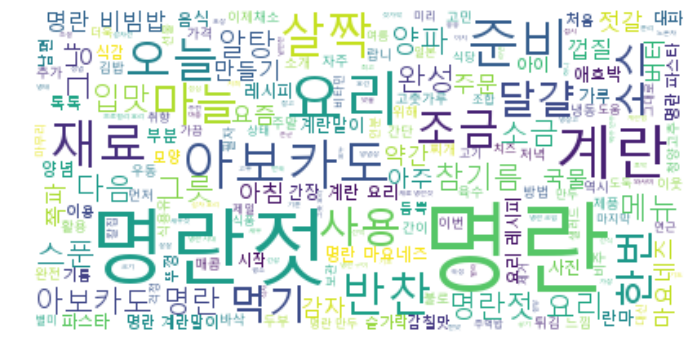

In [43]:
# 트위터 형태소 분석기로 추출한 명사로 워드클라우드를 그린다.
# Window의 경우 폰트 경로
# font_path = 'C:/Windows/Fonts/malgun.ttf';

wordcloud = WordCloud(
    font_path='/Library/Fonts/malgun.ttf',
    background_color='white'
).generate(' '.join(nostop_data_list))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()